In [3]:
import os
import re
import statistics
from src.najdi_rok import najdi_rok
from src.pocet_stran import pocet_stran
import pandas as pd

In [4]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)

In [5]:
df = pd.read_parquet(os.path.join("data","cnb_vyber.parquet"))

In [6]:
df['rok'] = df['008'].apply(lambda x: najdi_rok(x))

In [7]:
df['pocet_stran'] = df['300_a'].apply(lambda x: pocet_stran(x))

In [8]:
df[['pocet_stran','300_a']].sample(10)

,pocet_stran,300_a
001,,
bk195702887,407.0,"[407, [1] s. ;]"
bk195202334,296.0,[296 s. ;]
nkc20223423222,158.0,[158 stran ;]
bk195304339,89.0,[89 s. ;]
ck9003329,217.0,[217 s. :]
nkc20092025980,160.0,[160 s. :]
nkc20061648829,191.0,[191 s. :]
nkc20081817030,701.0,[701 s. ;]
nkc20122414504,92.0,[92 s. :]


In [9]:
df['pocet_stran'].quantile([0.1,0.25,0.5,0.75,0.9])

0.10     20.0
0.25     52.0
0.50    120.0
0.75    220.0
0.90    335.0
Name: pocet_stran, dtype: float64

In [10]:
nemala = df['pocet_stran'].quantile(0.25)

In [11]:
explo041 = df.explode('041_h')
preklady = explo041[(explo041['041_h'].notnull()) & (explo041['041_h'] != 'cze')]

## Podíl překladové literatury (spíš v datech než v realitě)

<Axes: xlabel='rok'>

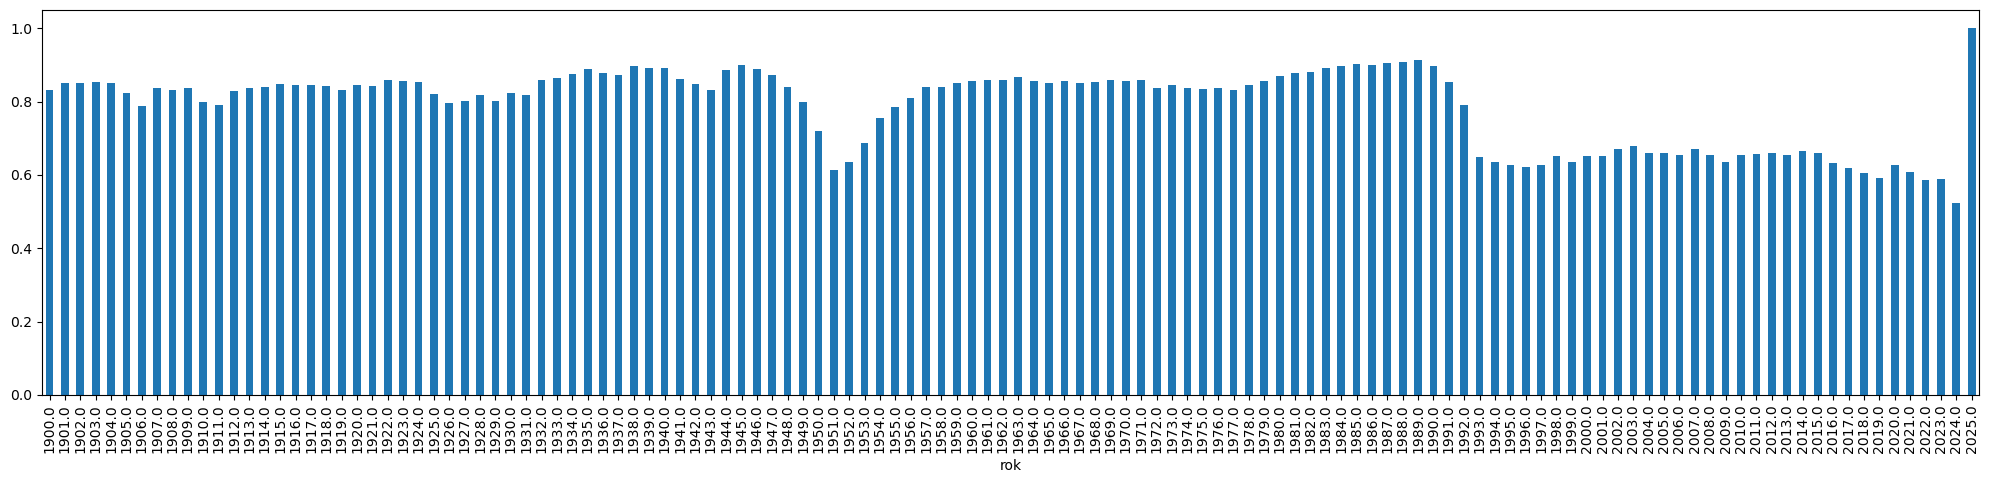

In [13]:
(explo041[explo041['041_h'].isnull()].groupby('rok').size() / df.groupby('rok').size()).plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

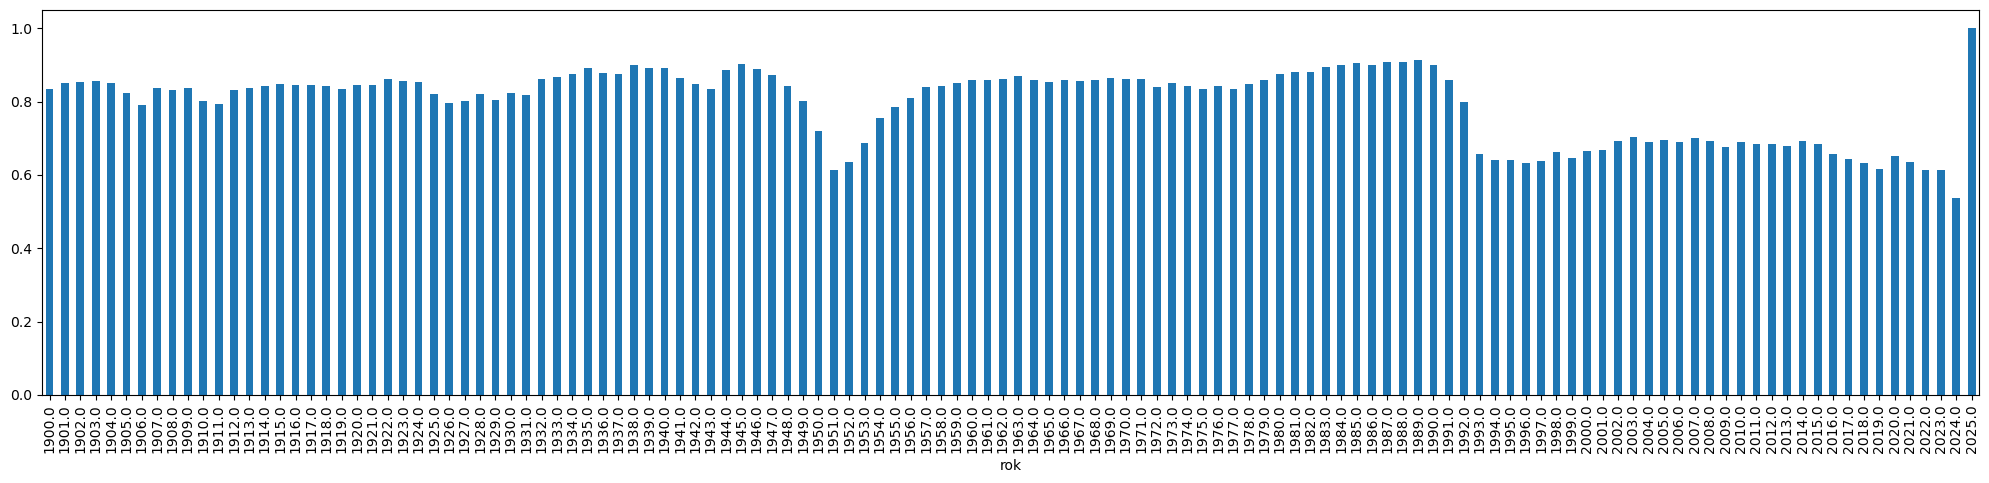

In [14]:
(explo041[explo041['041_h'].isnull() | (explo041['041_h'] == 'cze')].groupby('rok').size() / df.groupby('rok').size()).plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

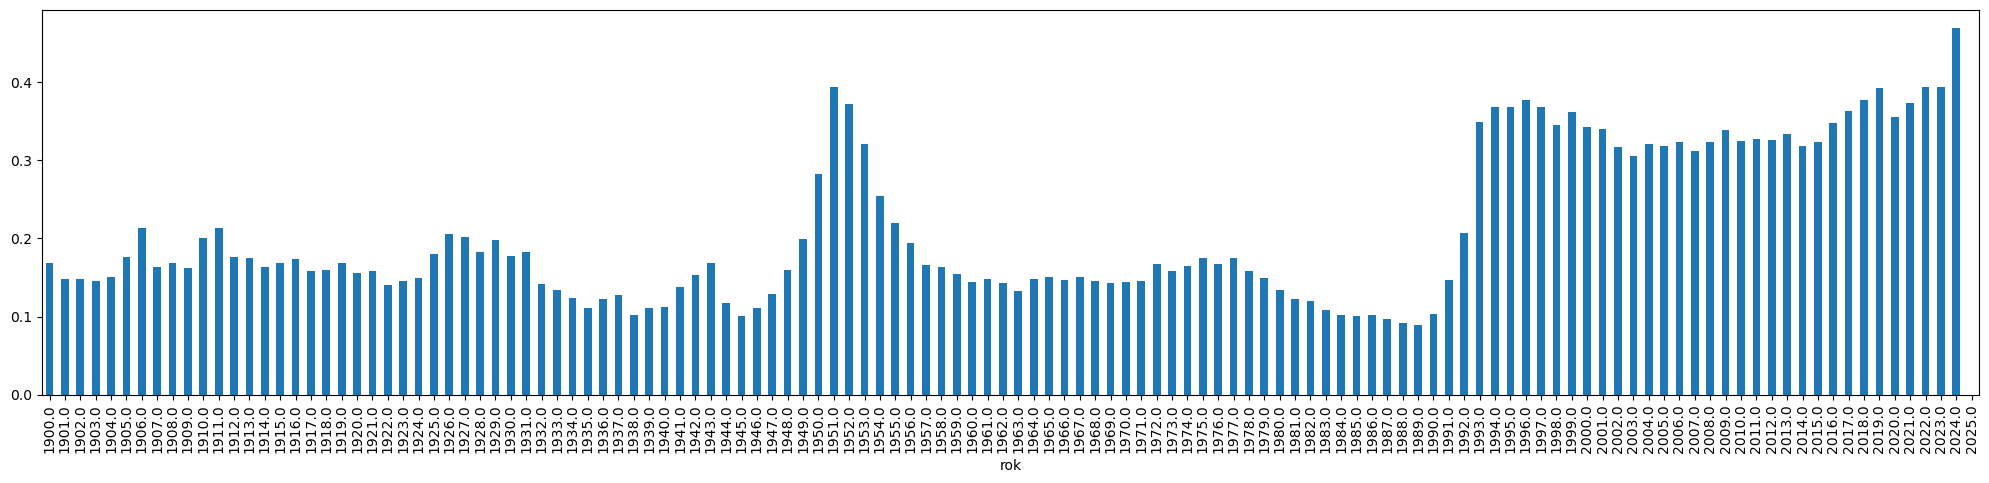

In [15]:
(preklady.groupby('rok').size() / df.groupby('rok').size()).plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

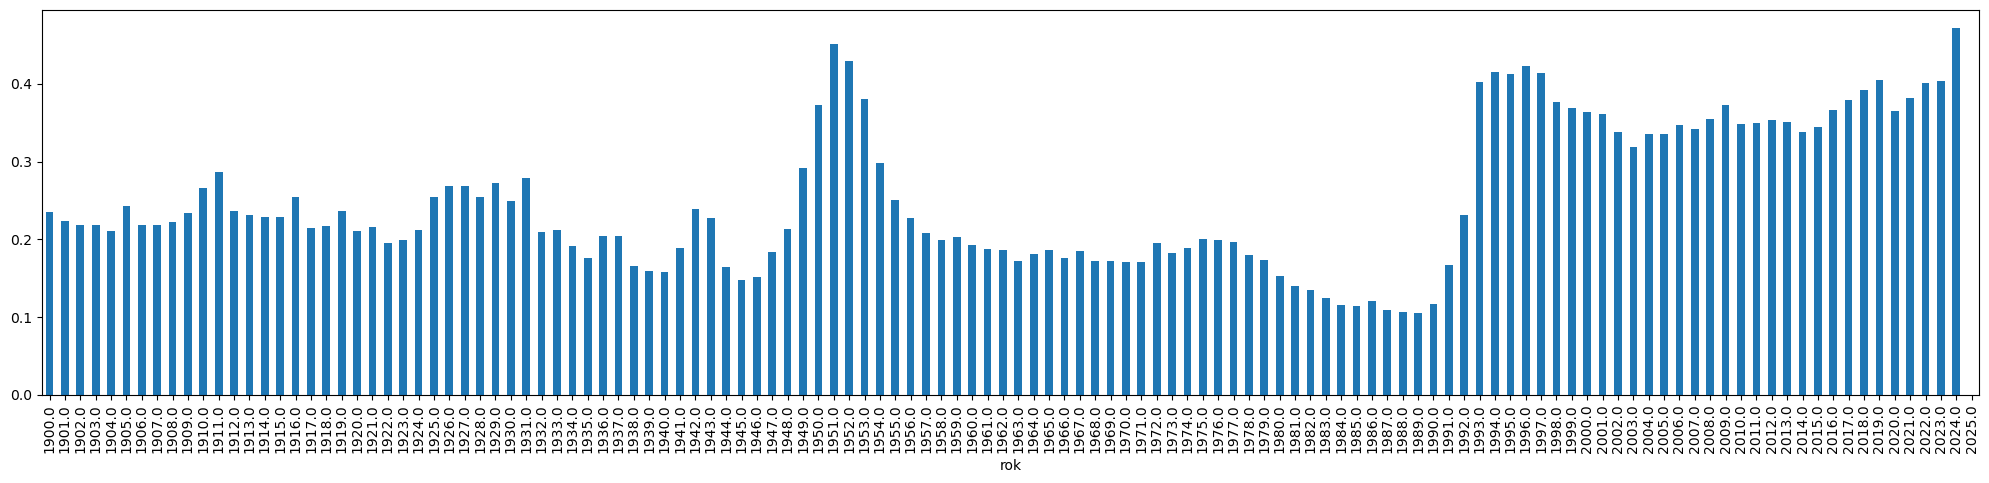

In [16]:
(preklady[preklady['pocet_stran'] >= nemala].groupby('rok').size() / df[df['pocet_stran'] >= nemala].groupby('rok').size()).plot.bar(figsize=(25,5))

## Jednotlivé jazyky

In [18]:
preklady.groupby('041_h').size().nlargest(40)

041_h
eng    91093
ger    44461
rus    20829
fre    17380
pol     4553
ita     4304
slo     4275
und     3858
spa     3476
lat     2139
mul     1821
swe     1773
dut     1226
hun     1192
nor      995
grc      970
dan      881
jpn      689
bul      609
chi      536
heb      500
ukr      438
fin      436
scr      430
sla      418
slv      381
por      372
rum      315
gre      194
hrv      189
ara      182
ice      163
srp      153
arc      152
san      132
kor      122
lit      111
est       94
ben       87
lav       80
dtype: int64

<Axes: xlabel='rok'>

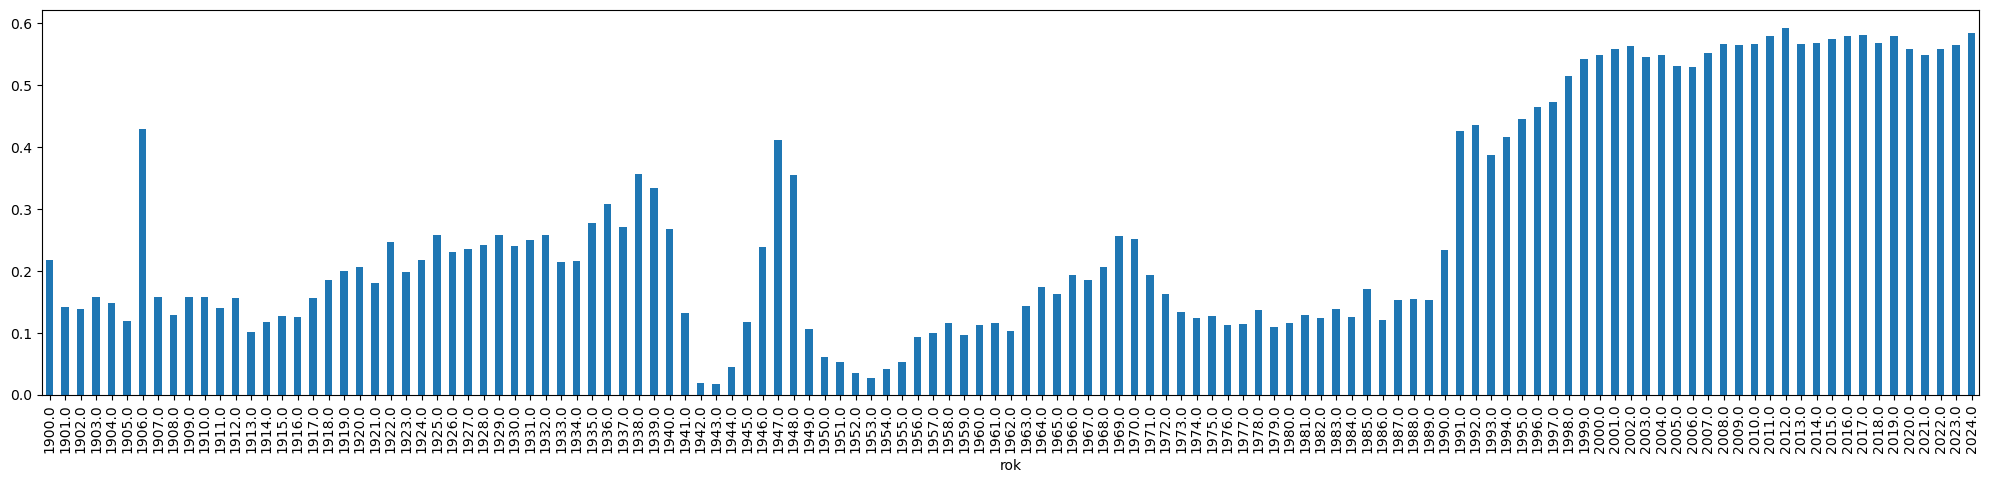

In [19]:
eng = (preklady[preklady['041_h'] == 'eng'].groupby('rok').size() / preklady.groupby('rok').size())
eng.plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

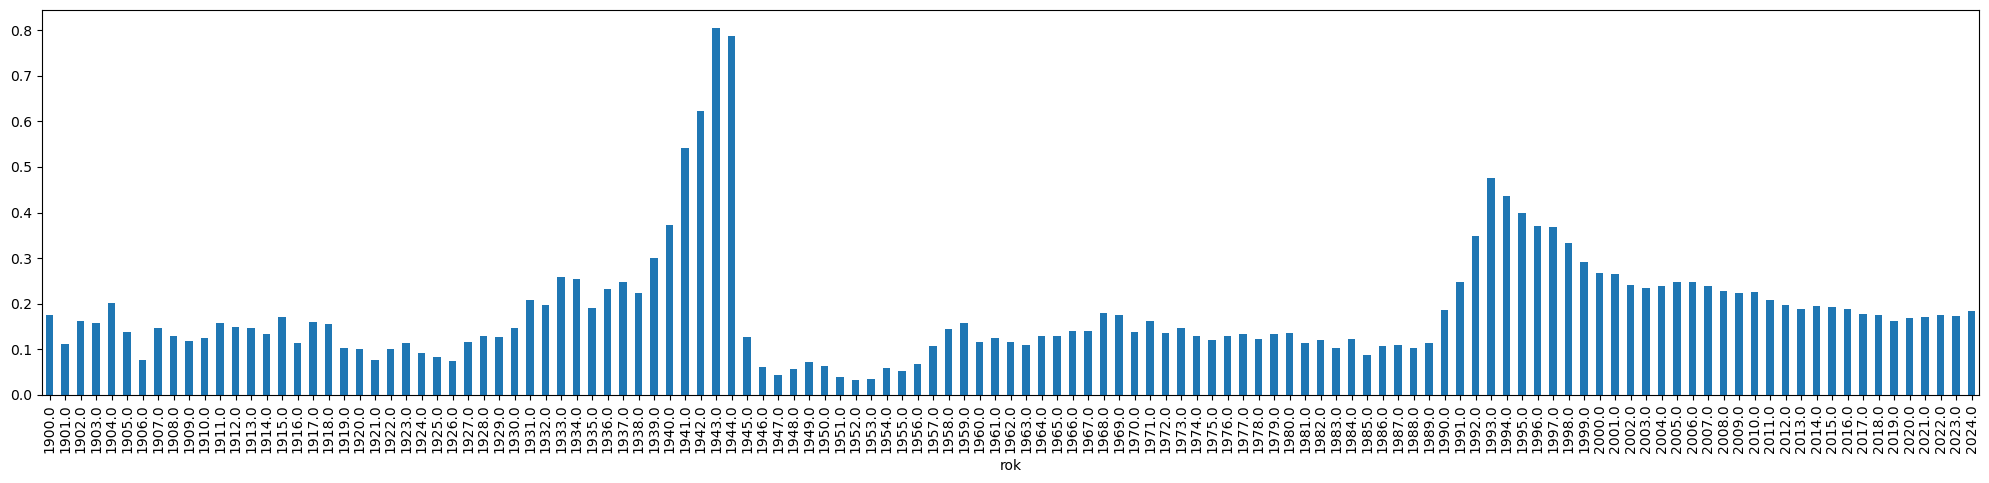

In [20]:
ger = (preklady[preklady['041_h'] == 'ger'].groupby('rok').size() / preklady.groupby('rok').size())
ger.plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

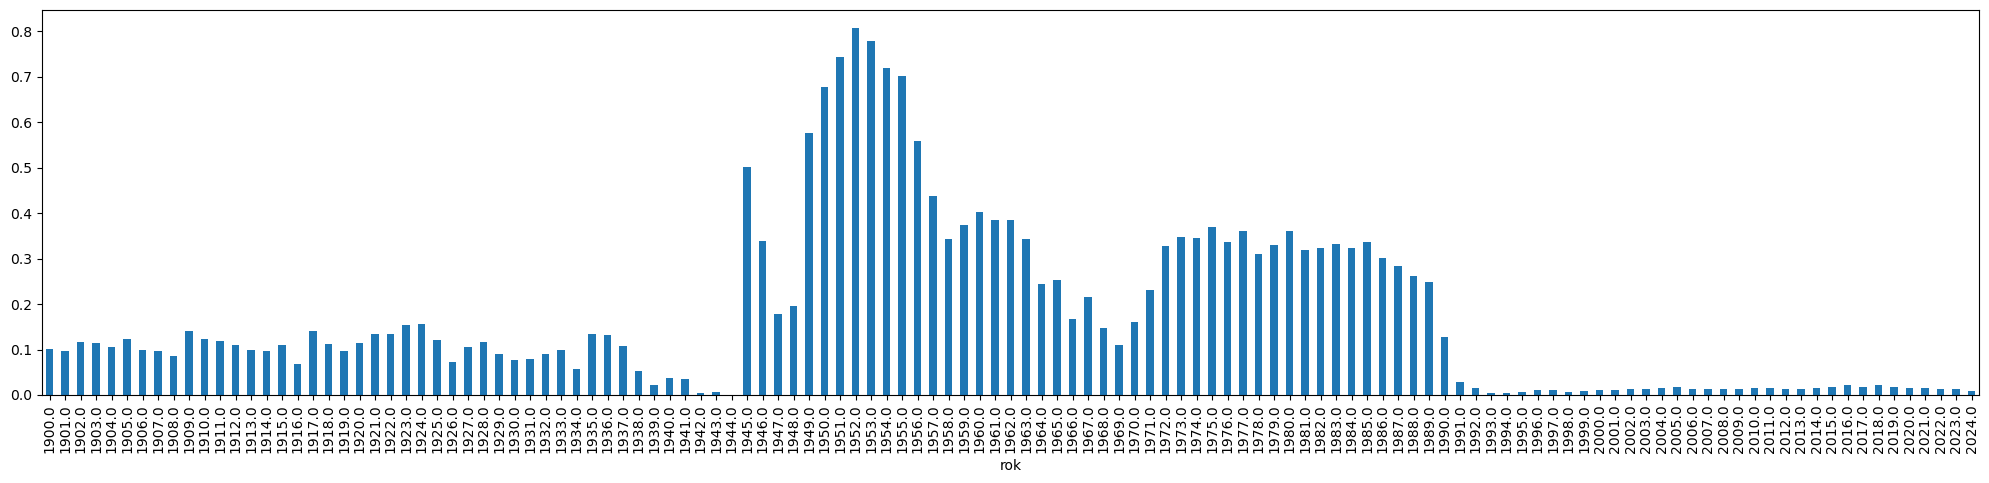

In [21]:
rus = (preklady[preklady['041_h'] == 'rus'].groupby('rok').size() / preklady.groupby('rok').size())
rus.plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

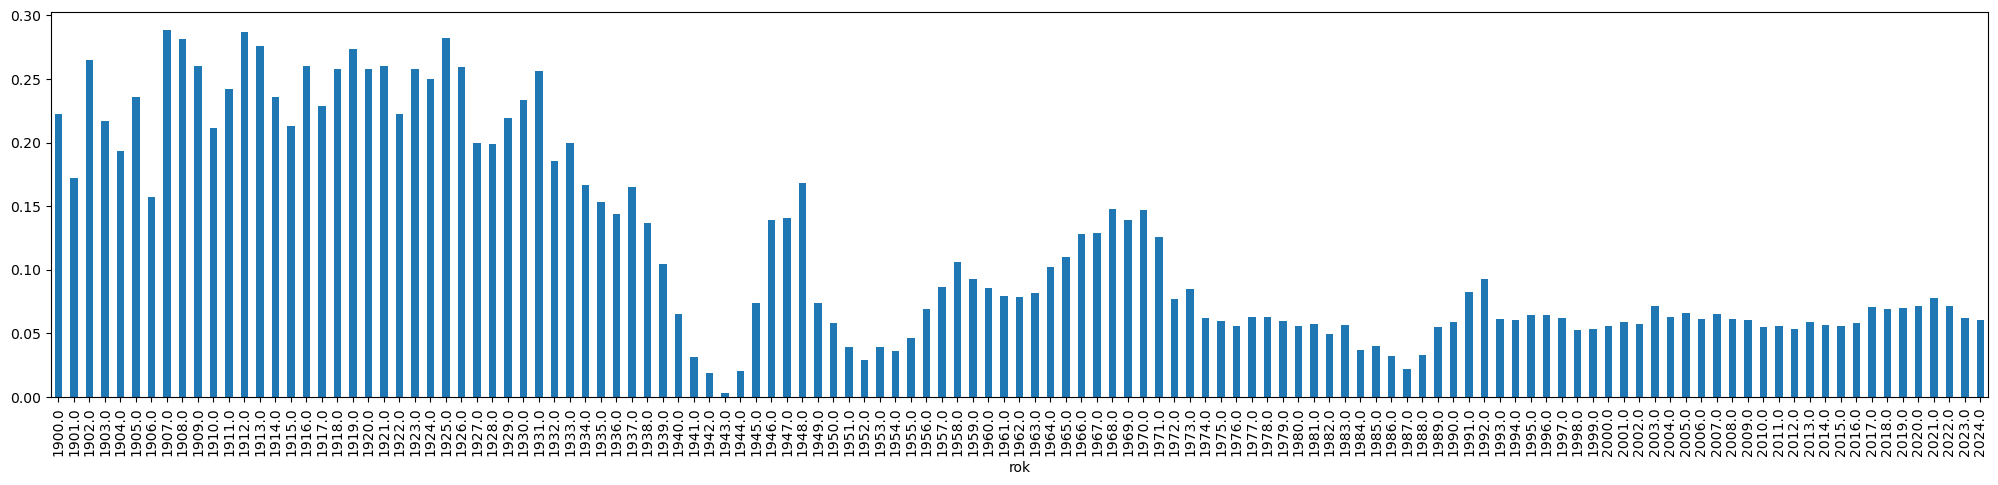

In [22]:
rus = (preklady[preklady['041_h'] == 'fre'].groupby('rok').size() / preklady.groupby('rok').size())
rus.plot.bar(figsize=(25,5))

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

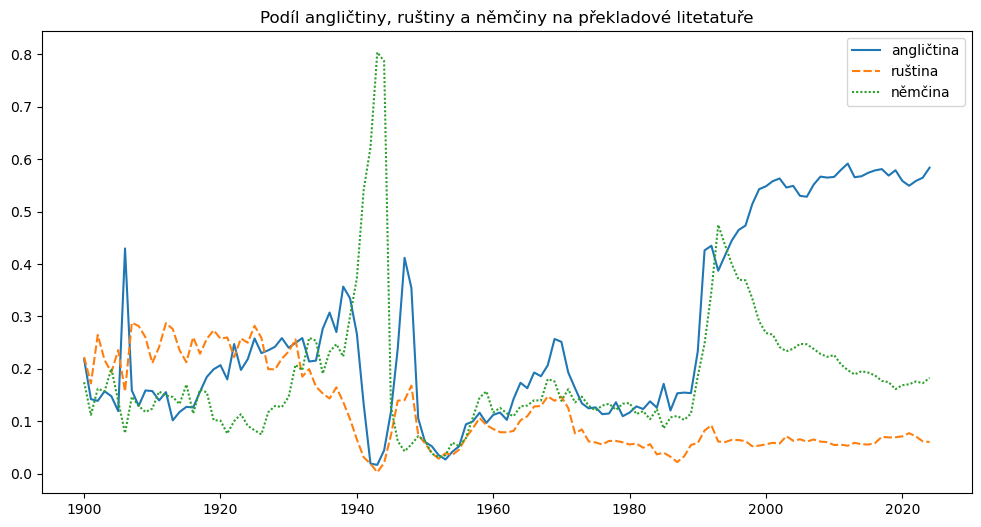

In [24]:
plt.figure(figsize=(12, 6))

df_plot = pd.DataFrame({'angličtina': eng, 'ruština': rus, 'němčina': ger})

# Create a line chart using seaborn
sns.lineplot(data=df_plot)

# Customize the chart (optional)
plt.title('Podíl angličtiny, ruštiny a němčiny na překladové litetatuře')
plt.ylabel('')
plt.xlabel('')
plt.legend()

# Show the chart
plt.show()

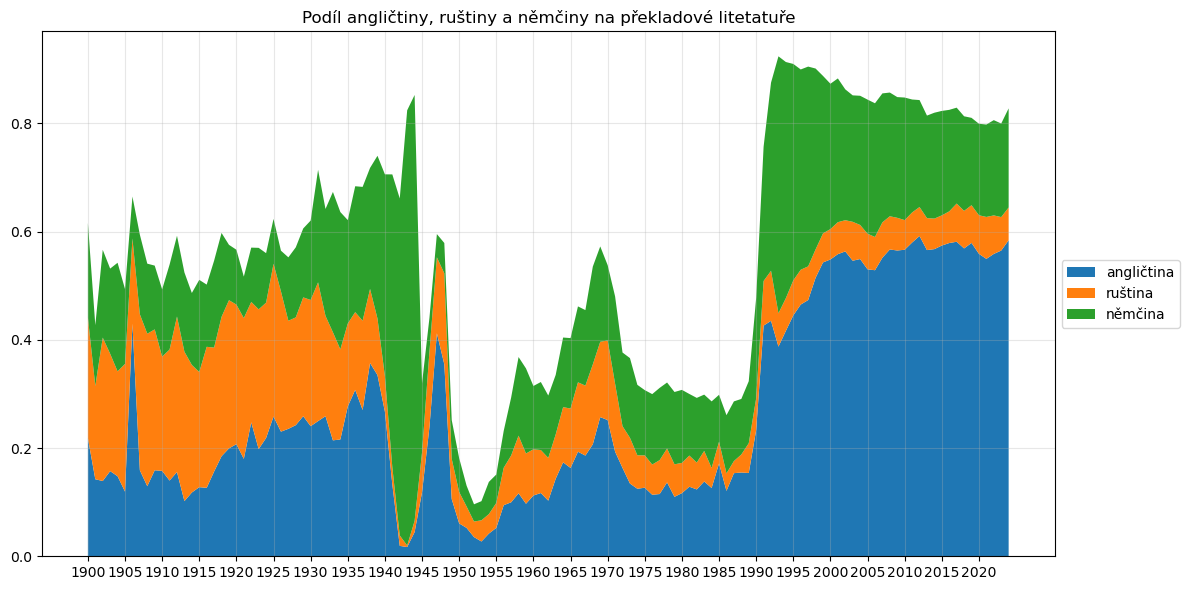

In [25]:
plt.figure(figsize=(12, 6))
df_plot = pd.DataFrame({'angličtina': eng, 'ruština': rus, 'němčina': ger})

# Create stacked area chart
plt.stackplot(df_plot.index, 
              df_plot['angličtina'],
              df_plot['ruština'], 
              df_plot['němčina'],
              labels=['angličtina', 'ruština', 'němčina'])

# Customize the chart
plt.title('Podíl angličtiny, ruštiny a němčiny na překladové litetatuře')
plt.ylabel('')
plt.xlabel('')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Add grid for better readability
plt.grid(True, alpha=0.3)

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.xticks([n for n in range(1900,2021) if n % 5 == 0])

plt.show()

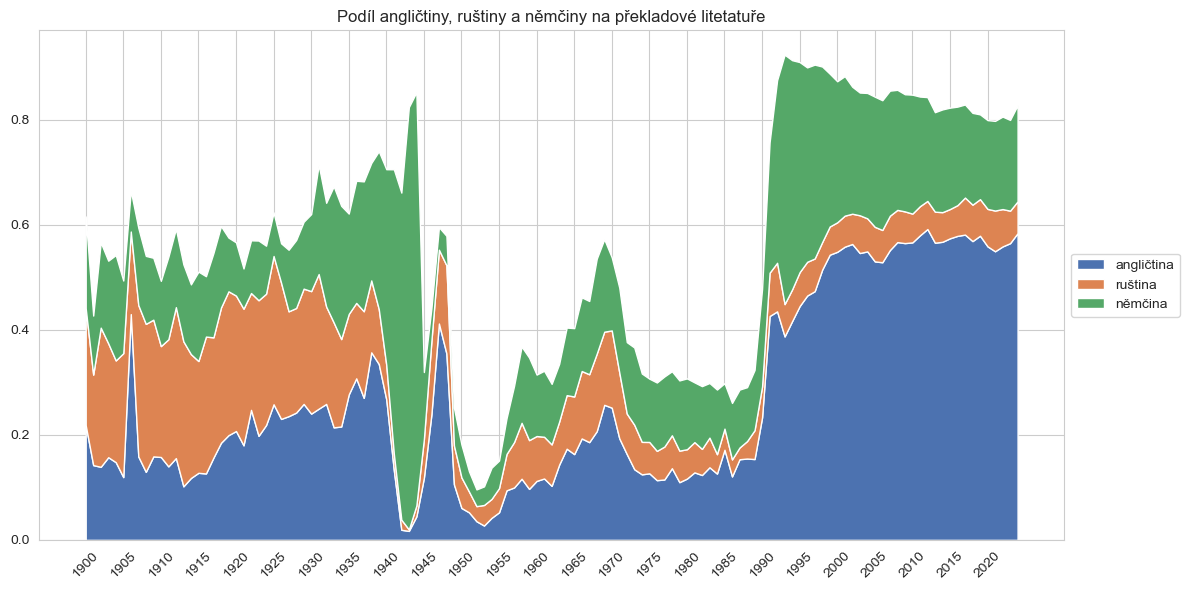

In [26]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Create the stacked area chart using Seaborn
# Note: Seaborn doesn't have a direct stackplot equivalent, so we'll use matplotlib's stackplot
# with Seaborn styling
sns.set_style("whitegrid", {'grid.alpha': 0.3})
sns.set_palette("deep")

df_plot = pd.DataFrame({'angličtina': eng, 'ruština': rus, 'němčina': ger})

plt.stackplot(df_plot.index, 
             df_plot['angličtina'],
             df_plot['ruština'], 
             df_plot['němčina'],
             labels=['angličtina', 'ruština', 'němčina'])

# Customize the chart
plt.title('Podíl angličtiny, ruštiny a němčiny na překladové litetatuře')
plt.ylabel('')
plt.xlabel('')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Set x-axis ticks
plt.xticks([n for n in range(1900,2021) if n % 5 == 0], rotation=45)

# Adjust layout
plt.tight_layout()

# Since we're using stackplot which doesn't have smoothing,
# no need to explicitly turn off smoothing

plt.show()

In [27]:
ger

rok
1900.0    0.174672
1901.0    0.112360
1902.0    0.162252
1903.0    0.157343
1904.0    0.200704
1905.0    0.138365
1906.0    0.077568
1907.0    0.147059
1908.0    0.129442
1909.0    0.117808
1910.0    0.124260
1911.0    0.156900
1912.0    0.149123
1913.0    0.146497
1914.0    0.132931
1915.0    0.170213
1916.0    0.114943
1917.0    0.160643
1918.0    0.155116
1919.0    0.102253
1920.0    0.101341
1921.0    0.076667
1922.0    0.100334
1923.0    0.113636
1924.0    0.091429
1925.0    0.082896
1926.0    0.075075
1927.0    0.117212
1928.0    0.129425
1929.0    0.127329
1930.0    0.146640
1931.0    0.207921
1932.0    0.197550
1933.0    0.259259
1934.0    0.253707
1935.0    0.191104
1936.0    0.232529
1937.0    0.247273
1938.0    0.223570
1939.0    0.300640
1940.0    0.372800
1941.0    0.541096
1942.0    0.622596
1943.0    0.803977
1944.0    0.786942
1945.0    0.127796
1946.0    0.062315
1947.0    0.042857
1948.0    0.056009
1949.0    0.071698
1950.0    0.062500
1951.0    0.038483
1952.0  

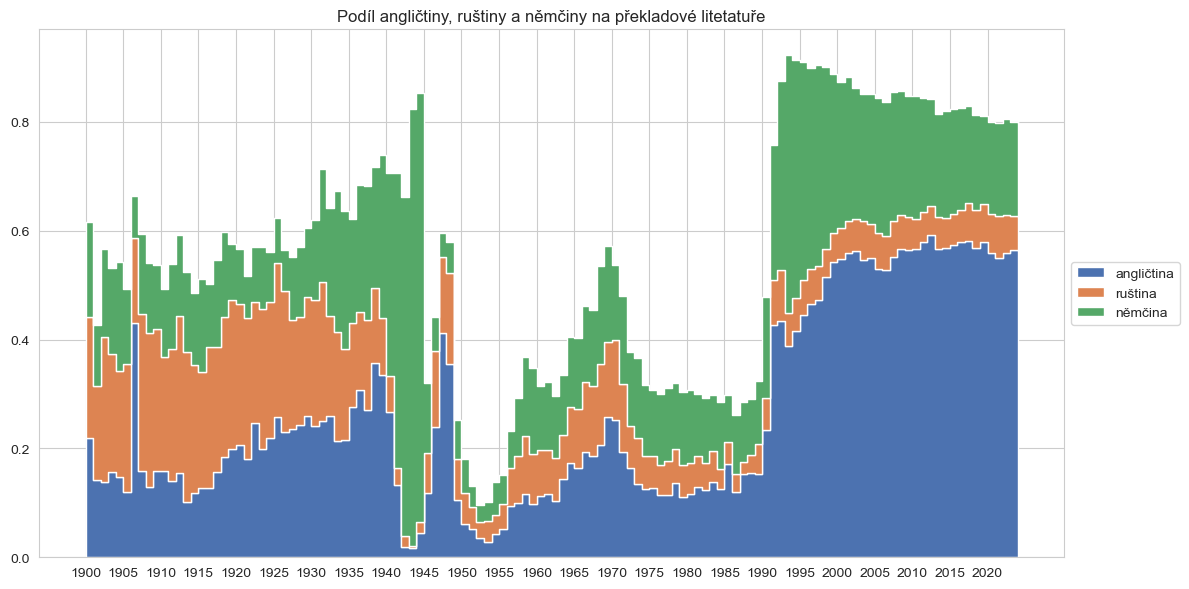

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(12, 6))

# Set Seaborn style
sns.set_style("whitegrid", {'grid.alpha': 0.3})
sns.set_palette("deep")

df_plot = pd.DataFrame({'angličtina': eng, 'ruština': rus, 'němčina': ger})

# Use step interpolation in stackplot
plt.stackplot(df_plot.index, 
             df_plot['angličtina'],
             df_plot['ruština'], 
             df_plot['němčina'],
             labels=['angličtina', 'ruština', 'němčina'],
             step='post')  # Add step interpolation

# Customize the chart
plt.title('Podíl angličtiny, ruštiny a němčiny na překladové litetatuře')
plt.ylabel('')
plt.xlabel('')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Set x-axis ticks
plt.xticks([n for n in range(1900,2021) if n % 5 == 0])

# Adjust layout
plt.tight_layout()

plt.show()

<Figure size 640x480 with 0 Axes>

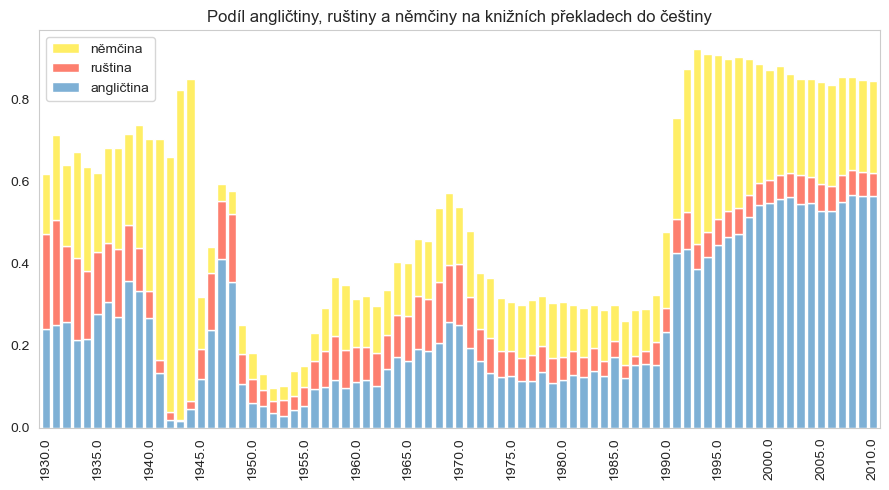

In [29]:
plt.figure()

# Set Seaborn style
sns.set_style("whitegrid", {'grid.alpha': 0.3})
sns.set_palette("deep")

# Assuming df_plot is already created as before
df_plot = pd.DataFrame({'angličtina': eng, 'ruština': rus, 'němčina': ger}).tail(95).head(81)

# Create the stacked bar chart
ax = df_plot.plot(
    kind='bar',
    stacked=True,
    figsize=(9, 5),
    width=0.8,
    color = ["#7eb0d5", "#fd7f6f", "#ffee65"]
)
ax.grid(False)

# Customize the chart
plt.title('Podíl angličtiny, ruštiny a němčiny na knižních překladech do češtiny')
plt.ylabel('')
plt.xlabel('')
plt.legend(loc='upper left', reverse=True)

# Set x-axis ticks
plt.xticks(
    [n for n in range(0, len(df_plot.index), 5)],  # Position of ticks
    [str(year) for year in df_plot.index[::5]],    # Labels for ticks
    rotation=90
)

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()

<Axes: xlabel='rok'>

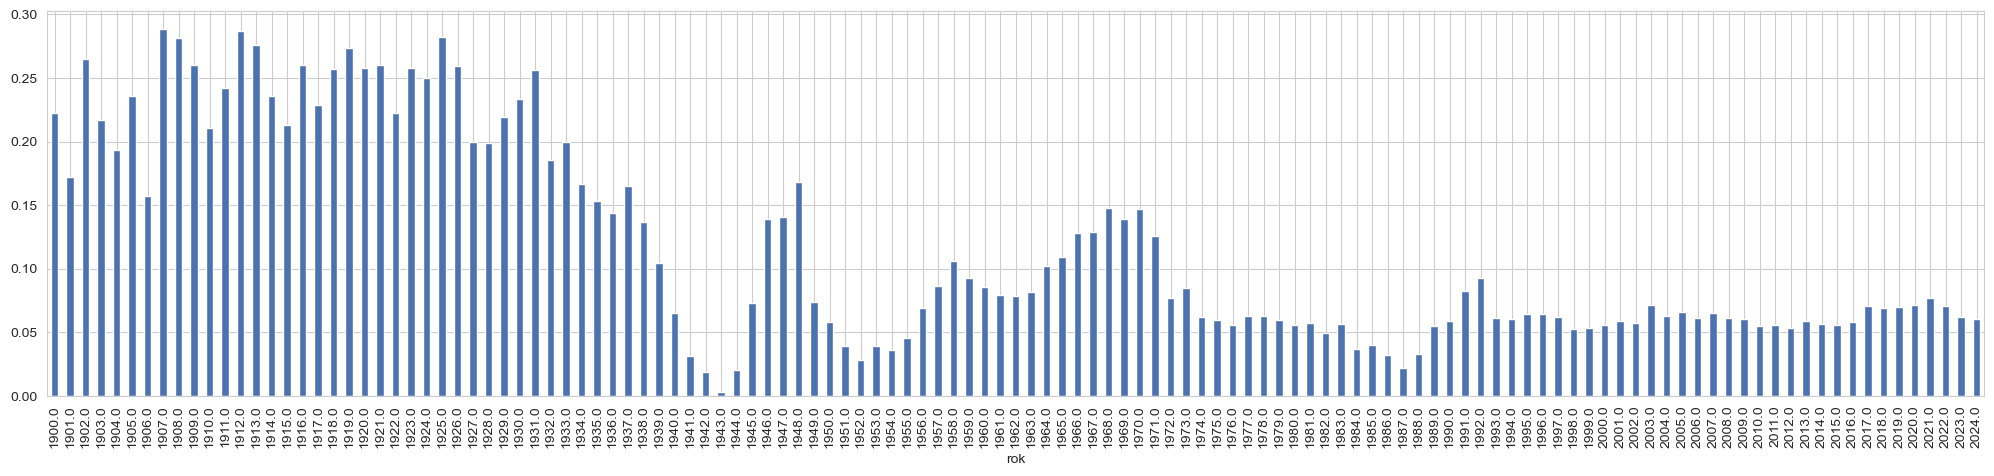

In [30]:
(preklady[preklady['041_h'] == 'fre'].groupby('rok').size() / preklady.groupby('rok').size()).plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

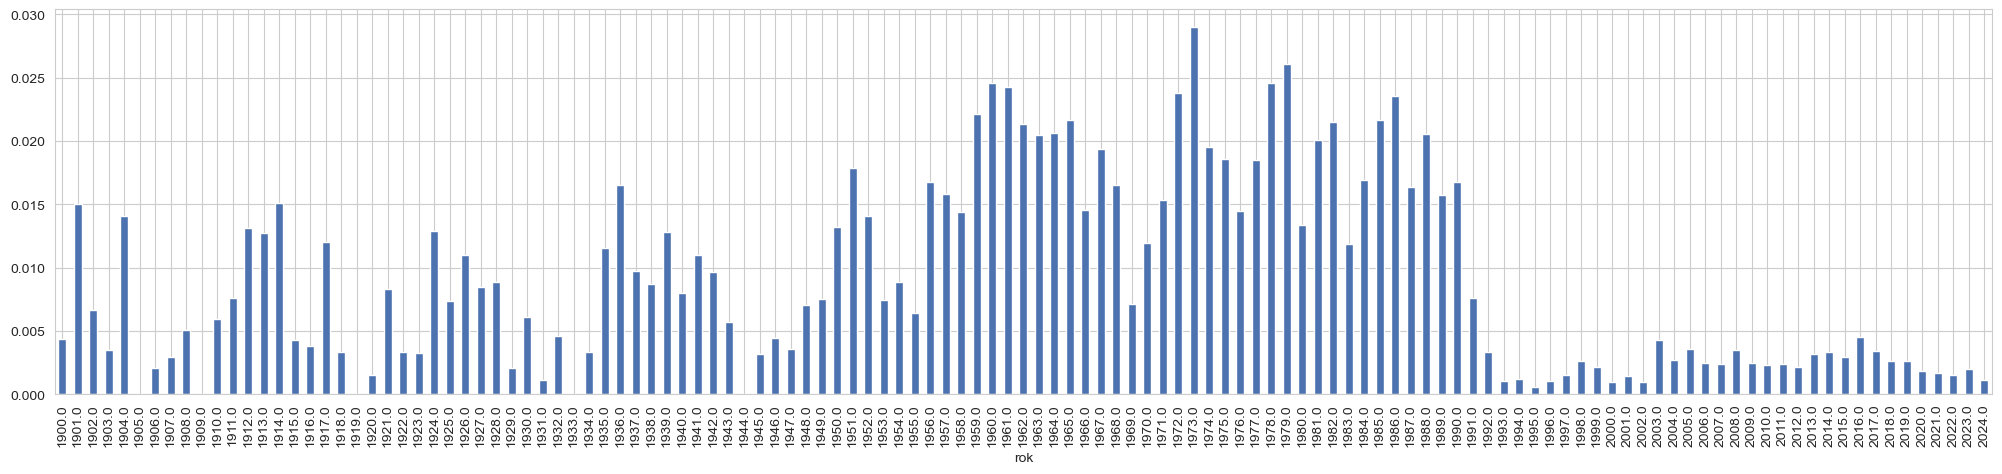

In [31]:
(preklady[preklady['041_h'] == 'hun'].groupby('rok').size() / preklady.groupby('rok').size()).plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

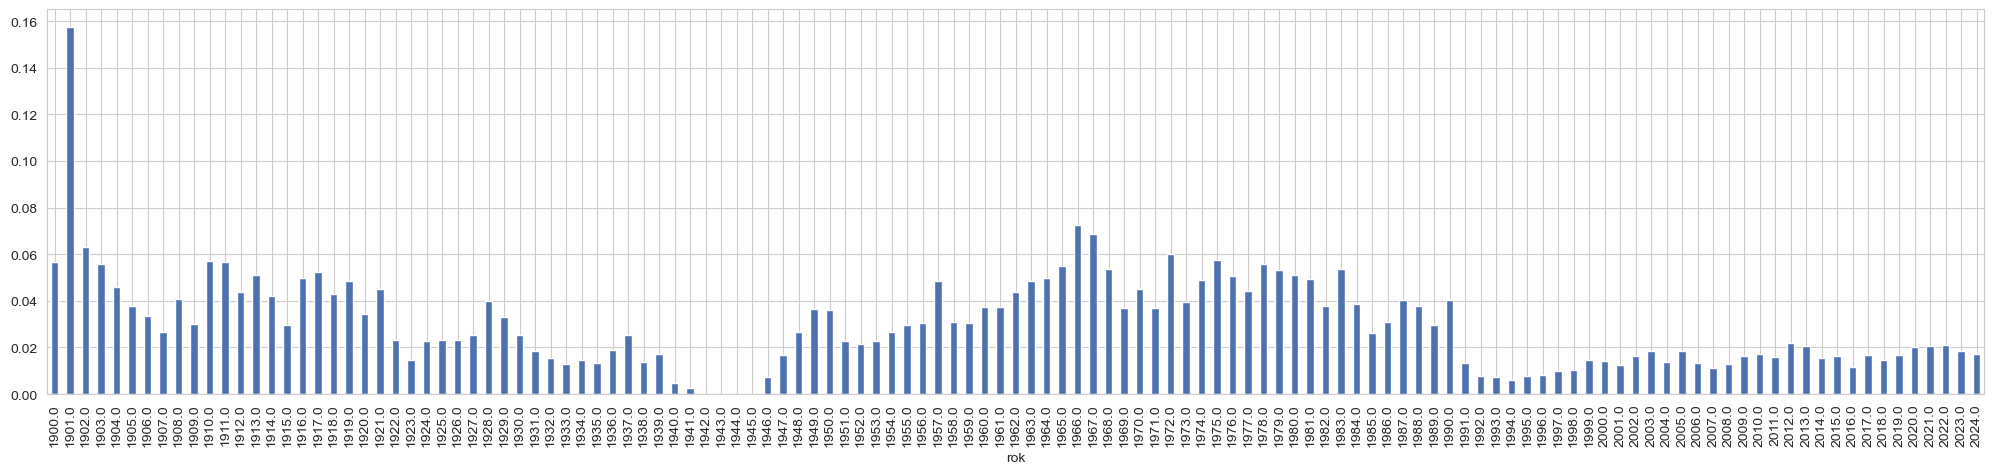

In [32]:
(preklady[preklady['041_h'] == 'pol'].groupby('rok').size() / preklady.groupby('rok').size()).plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

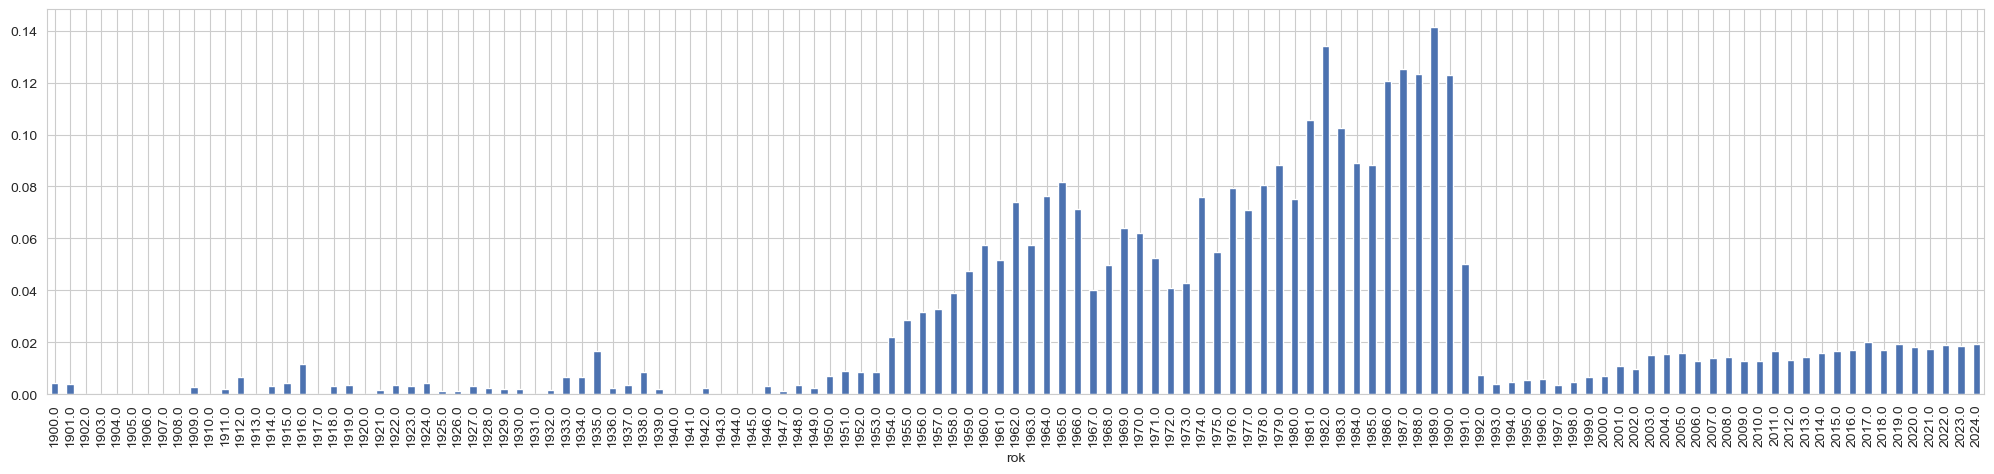

In [33]:
(preklady[preklady['041_h'] == 'slo'].groupby('rok').size() / preklady.groupby('rok').size()).plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

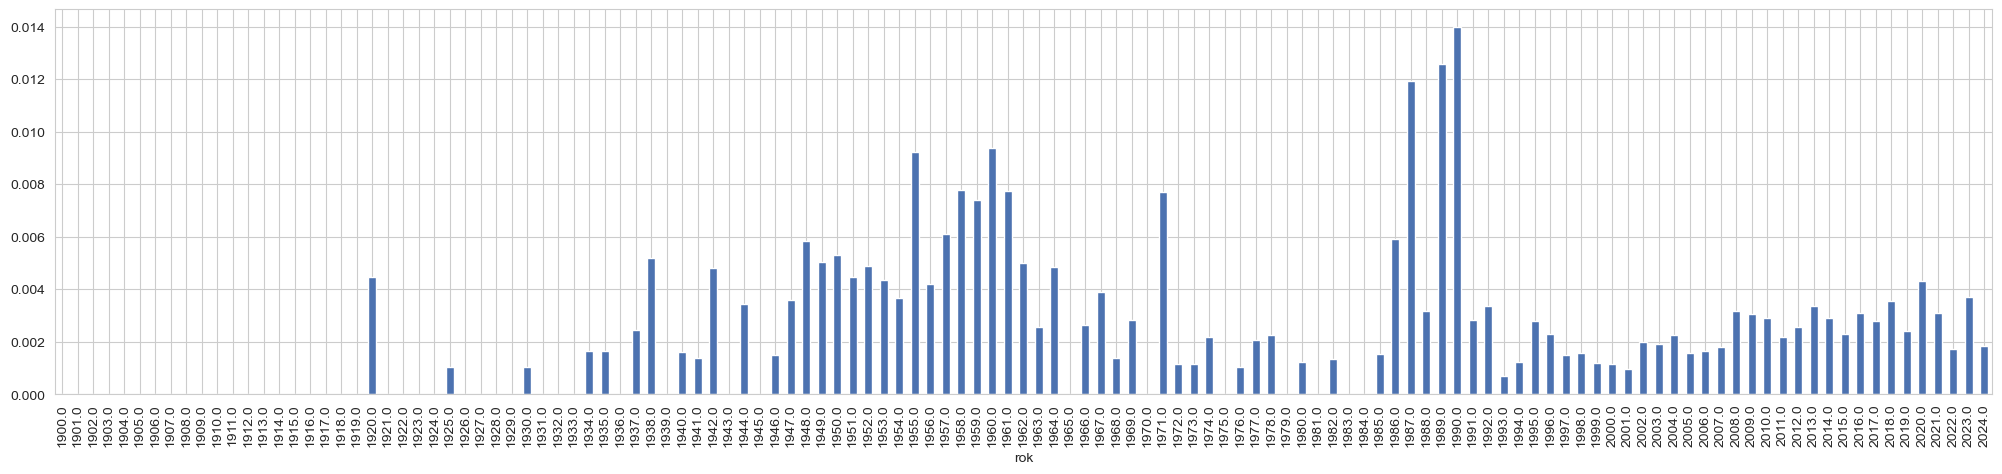

In [34]:
(preklady[preklady['041_h'] == 'chi'].groupby('rok').size() / preklady.groupby('rok').size()).plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

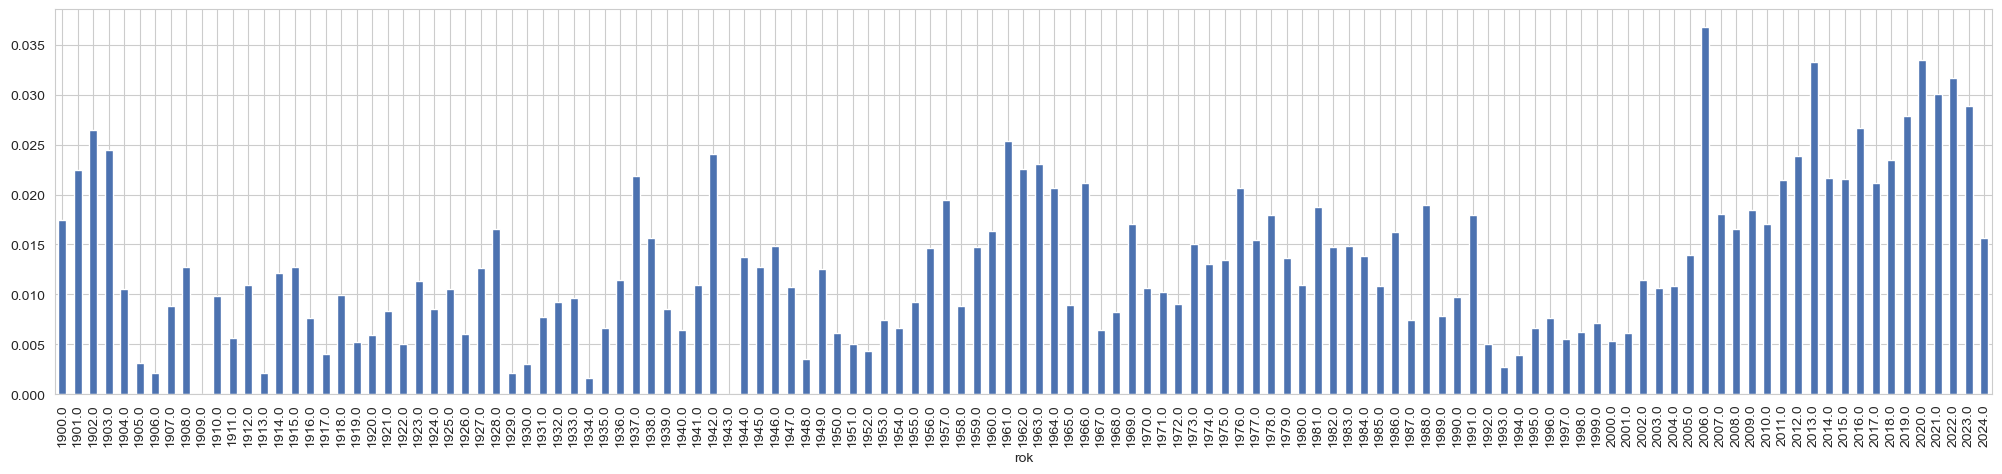

In [35]:
(preklady[preklady['041_h'] == 'spa'].groupby('rok').size() / preklady.groupby('rok').size()).plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

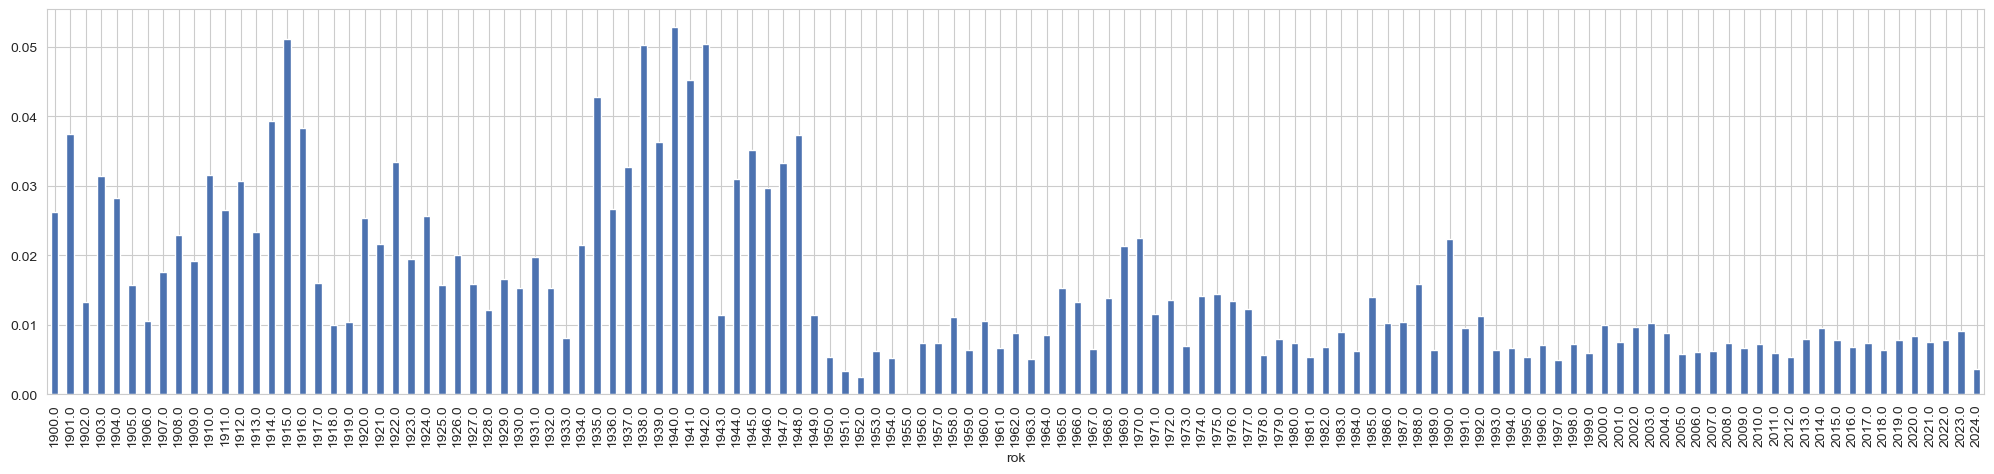

In [36]:
(preklady[preklady['041_h'] == 'lat'].groupby('rok').size() / preklady.groupby('rok').size()).plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

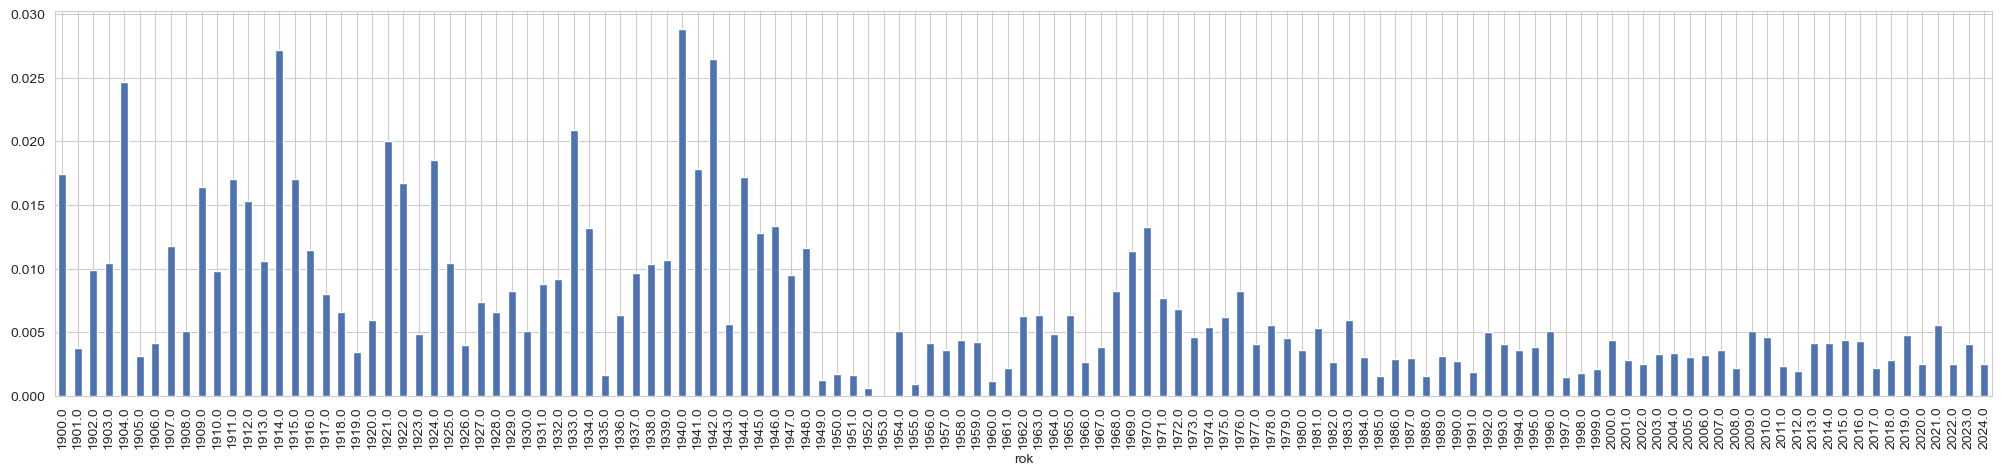

In [37]:
(preklady[preklady['041_h'] == 'grc'].groupby('rok').size() / preklady.groupby('rok').size()).plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

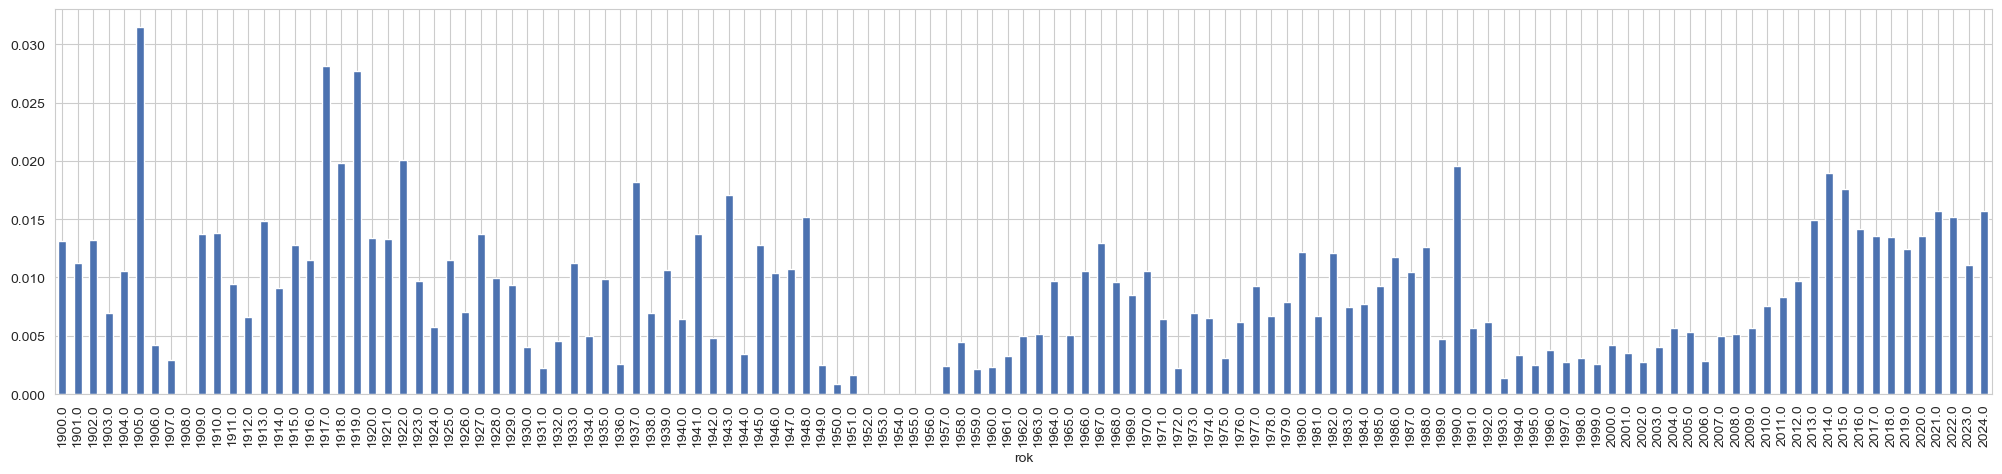

In [38]:
(preklady[preklady['041_h'] == 'swe'].groupby('rok').size() / preklady.groupby('rok').size()).plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

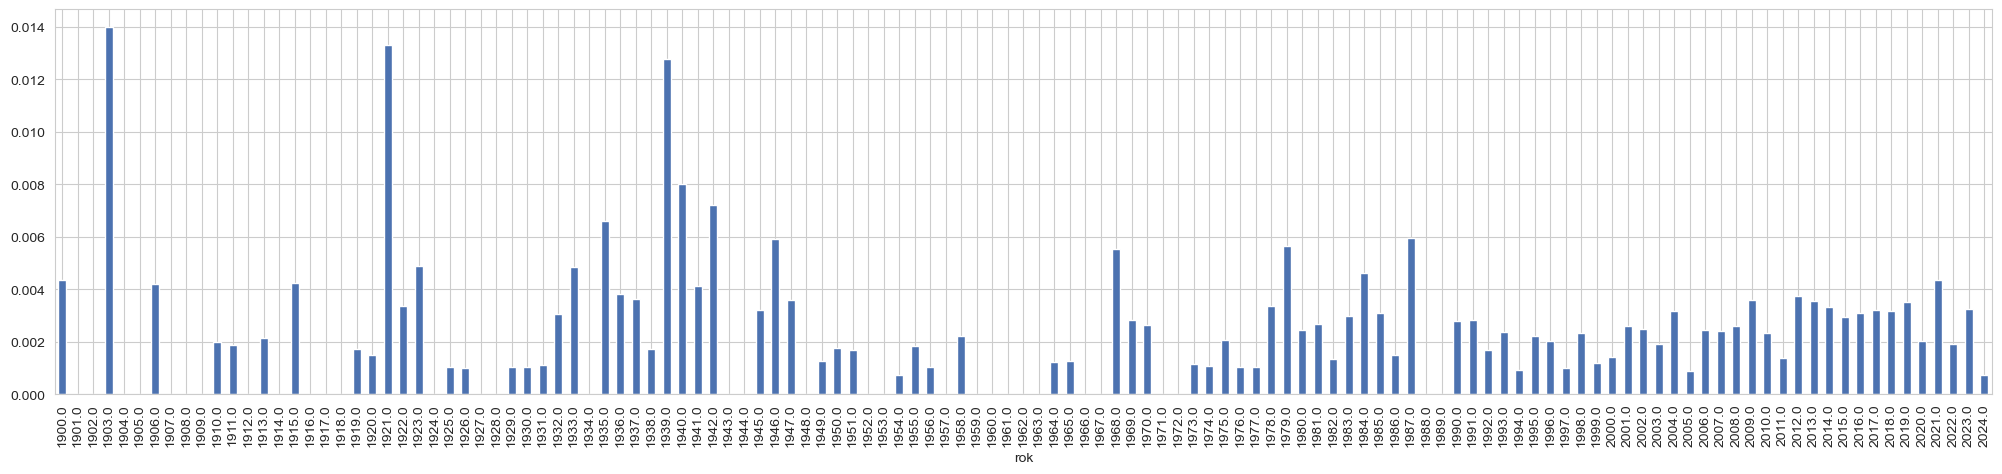

In [39]:
(preklady[preklady['041_h'] == 'heb'].groupby('rok').size() / preklady.groupby('rok').size()).plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

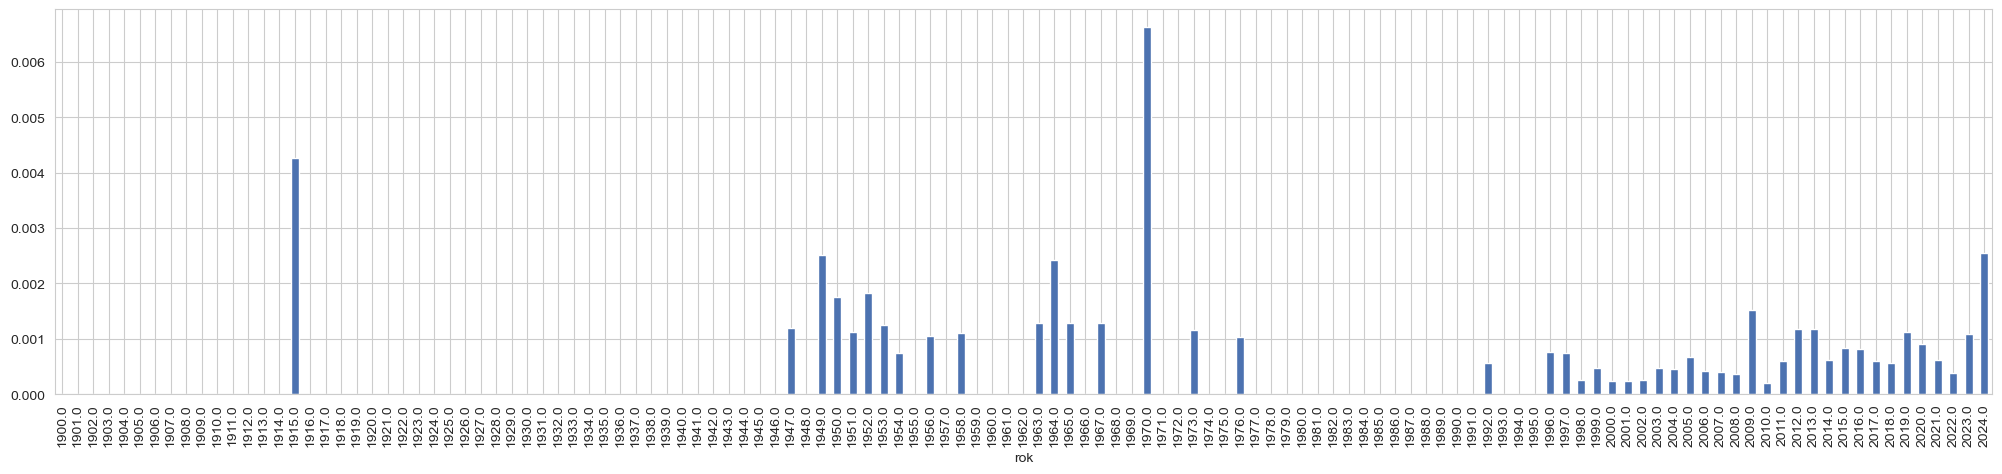

In [40]:
(preklady[preklady['041_h'] == 'kor'].groupby('rok').size() / preklady.groupby('rok').size()).plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

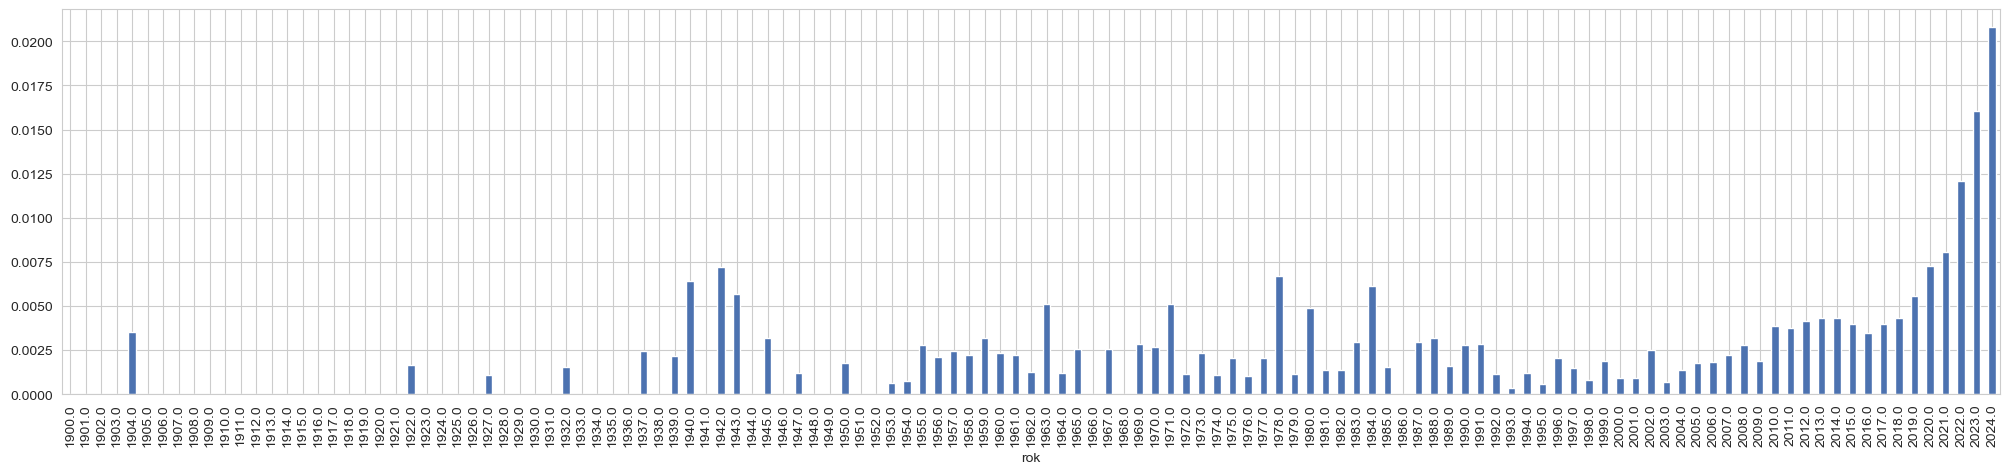

In [41]:
(preklady[preklady['041_h'] == 'jpn'].groupby('rok').size() / preklady.groupby('rok').size()).plot.bar(figsize=(25,5))

## První překlady

In [43]:
preklady[['rok','041_h','100_a','245_a']].sort_values(by='rok').groupby('041_h').first().sort_values(by='rok')

,rok,100_a,245_a
041_h,,,
lat,1900.0,"Bělohubek, August",Listář královského věnného města Chrudimi.
dan,1900.0,"Drachmann, Holger,",Byl jednou jeden král-- :
eng,1900.0,"Clark, Albert Warren,",Zítra /
epo,1900.0,"Zamenhof, Ludwik,",Mezinárodní řeč Esperanto :
fre,1900.0,"Maupassant, Guy de,",Dědictví /
ger,1900.0,"Külpe, Oswald,",Úvod do filosofie /
swe,1900.0,"Leffler, Anne Charlotte,",Soňa Kovalevská :
heb,1900.0,"Kämpf, Saul Isaac,","Biblí svatá, aneb, Všecka svatá písma Starého ..."
spa,1900.0,"Calderón de la Barca, Pedro,",Lékař své cti :


In [44]:
df[df['245_a'].astype(str).str.contains('Čínské recepty v české kuchyni',na=False)]

,008,020_a,020_c,020_q,041_a,041_h,041_ind1,044_a,072_a,072_x,080_a,100_4,100_7,100_a,100_d,240_l,245_a,245_c,245_n,245_p,246_a,250_a,250_b,260_a,260_b,260_c,260_e,260_f,260_ind1,264_a,264_b,264_c,264_ind2,300_a,300_b,300_c,490_a,490_v,500_a,520_a,520_b,521_a,546_a,648_a,650_a,650_x,650_y,650_z,651_a,653_a,655_a,700_4,700_7,700_a,700_d,710_4,710_7,710_a,710_b,830_a,928_a,964_a,leader,rok,pocet_stran
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
cpk19990704624,990831q1997199 xr f e f 000 | cze,[80-86132-13-7],"[Kč 89,00]",[(brož.) :],[cze],[slo],1,None,[641],[Kuchařství. Potraviny. Vařená jídla],"[641.55(083.12), 641/642, (510), (437.3), (083...",[aut],xx0001238,"Horecká, Jana",None,None,Čínské recepty v české kuchyni /,Jana Horecká,None,None,None,None,None,[Ostrava :],"[Knižní expres,]",[[1999?]],None,None,None,None,None,None,None,"[119 s., [8] s. barev. obr. příl. ;]",None,[20 cm],[Recepty šikovné hospodyňky],None,[Překlad ze slovenštiny Elfrída Nacherová ; fo...,None,None,None,None,None,"[kuchařské recepty, kuchyně, cooking recipes, ...",None,None,"[Čína, Česko, China, Czechia]",None,None,"[kuchařské recepty, cookbooks]",None,None,None,None,None,None,None,None,[Recepty šikovné hospodyňky],None,None,nam a22 a 4500,NaN,119.0
cpk20041278387,040330s2003 xr af e 000 0 cze,"[80-86132-76-5, 80-86132-77-3]",None,"[(váz.), (brož.)]",[cze],[slo],1,None,[641],[Kuchařství. Potraviny. Vařená jídla],"[641.568(510), (083.12)]",[aut],xx0001238,"Horecká, Jana",None,None,Čínské recepty v české kuchyni /,Jana Horecká,None,None,None,[2. vyd.],None,[Ostrava :],"[Knižní expres,]",[[2003]],None,None,None,None,None,None,None,"[104 s., [8] s. barev. obr. příl. :]",[il. ;],[22 cm],[Prima recepty],None,[Překlad ze slovenštiny],None,None,None,None,None,"[čínská jídla, Chinese cookery]",None,None,None,None,None,"[kuchařské recepty, cookbooks]",None,None,None,None,None,None,None,None,[Prima recepty],None,None,nam a22 a 4500,2003.0,104.0
